# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
# print(X_train.shape[1])
# print(X_train.shape[0])
# print(X_train.shape)

[[0.6202352  0.62226277 0.64436334 ... 0.79622871 0.81062449 0.74371452]
 [0.62226277 0.64436334 0.61719384 ... 0.81062449 0.74371452 0.77007299]
 [0.64436334 0.61719384 0.61820762 ... 0.74371452 0.77007299 0.73641525]
 ...
 [0.19870235 0.21796431 0.21553122 ... 0.14963504 0.14801298 0.15815085]
 [0.21796431 0.21553122 0.20600162 ... 0.14801298 0.15815085 0.16504461]
 [0.21553122 0.20600162 0.21654501 ... 0.15815085 0.16504461 0.15896188]]


In [23]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train)

[[[0.6202352 ]
  [0.62226277]
  [0.64436334]
  ...
  [0.79622871]
  [0.81062449]
  [0.74371452]]

 [[0.62226277]
  [0.64436334]
  [0.61719384]
  ...
  [0.81062449]
  [0.74371452]
  [0.77007299]]

 [[0.64436334]
  [0.61719384]
  [0.61820762]
  ...
  [0.74371452]
  [0.77007299]
  [0.73641525]]

 ...

 [[0.19870235]
  [0.21796431]
  [0.21553122]
  ...
  [0.14963504]
  [0.14801298]
  [0.15815085]]

 [[0.21796431]
  [0.21553122]
  [0.20600162]
  ...
  [0.14801298]
  [0.15815085]
  [0.16504461]]

 [[0.21553122]
  [0.20600162]
  [0.21654501]
  ...
  [0.15815085]
  [0.16504461]
  [0.15896188]]]


In [7]:
# Part 2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

W0716 10:40:11.581972 10496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 10:40:11.608416 10496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 10:40:11.611506 10496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 10:40:11.837905 10496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 10:40:11.843889 10496 deprecation.py:506

In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



W0716 10:40:22.961938 10496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 10:40:23.200572 10496 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 10:40:25.134505 10496 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0126
Epoch 2/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 3/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 4/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0027
Epoch 5/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0025
Epoch 6/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0020
Epoch 7/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0021
Epoch 8/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0022
Epoch 9/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0023
Epoch 10/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 11/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 12/100
1975/1975 [==============================] - 7s 3ms/step - lo

1975/1975 [==============================] - 7s 3ms/step - loss: 8.3034e-04
Epoch 95/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.8162e-04
Epoch 96/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.3194e-04
Epoch 97/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.3173e-04
Epoch 98/100
1975/1975 [==============================] - 7s 3ms/step - loss: 6.7623e-04
Epoch 99/100
1975/1975 [==============================] - 7s 3ms/step - loss: 5.7971e-04
Epoch 100/100
1975/1975 [==============================] - 7s 3ms/step - loss: 7.2967e-04


In [14]:
# Part 3 - Making the predictions and visualising the results
# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [25]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_total.shape)


(2035, 8)
(16, 8)
(2051,)


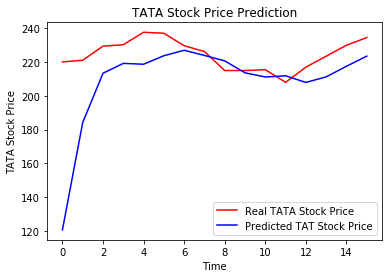

In [16]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()